In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%pwd # change to project root dir 

'/Users/cgu3/Documents/Crispr/notebook'

In [3]:
%cd /Users/cgu3/Documents/Crispr

/Users/cgu3/Documents/Crispr


Manually change the first column name as "sgRNA" in the count-file since r write.csv doesn't assign a column name for it 

In [4]:
import subprocess

# Generate the samples list
samples = [f"sample_het_{i}" for i in range(1, 7)] + [f'sample_wt_{i}' for i in range(1, 7)]

# Define the command and arguments, incorporating the samples list correctly
command = [
    'python', 'src/python/file_transform.py',
    '--count-file', 'data/results_without_aggregation.csv',
    '--samples', *samples,  # Use * to unpack the list of samples into individual arguments
    '--output', 'data',
    '--name', 'mageck_input'
]

# Execute the command
subprocess.run(command)

CompletedProcess(args=['python', 'src/python/file_transform.py', '--count-file', 'data/results_without_aggregation.csv', '--samples', 'sample_het_1', 'sample_het_2', 'sample_het_3', 'sample_het_4', 'sample_het_5', 'sample_het_6', 'sample_wt_1', 'sample_wt_2', 'sample_wt_3', 'sample_wt_4', 'sample_wt_5', 'sample_wt_6', '--output', 'data', '--name', 'mageck_input'], returncode=0)

In [9]:
df = pd.read_table('data/mageck_input_merged_counts.txt', sep='\t')

In [10]:
df.head()

,sgRNA,Gene,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6
0,negative_control_1,negative_control_1,25,729,415,454,269,0,0,0,0,459,0,0
1,negative_control_10,negative_control_10,0,401,0,441,385,0,489,445,352,899,2266,1
2,negative_control_100,negative_control_100,773,504,738,153,335,0,251,181,0,417,0,0
3,negative_control_1000,negative_control_1000,167,908,0,691,133,352,552,0,1,363,0,1
4,negative_control_1001,negative_control_1001,0,0,0,339,0,0,0,0,1,161,0,0


In [94]:
df[df['sgRNA'].str.contains('negative_control')][count_cols].median()
df[df['sgRNA'].str.contains('negative_control')][count_cols].mean()
(df[df['sgRNA'].str.contains('negative_control')][count_cols] == 0).all(axis=1).mean()
(df[df['sgRNA'].str.contains('negative_control')][count_cols] == 0).any(axis=1).mean()

sample_het_1    0.0
sample_het_2    0.0
sample_het_3    0.0
sample_het_4    0.0
sample_het_5    0.0
sample_het_6    0.0
sample_wt_1     0.0
sample_wt_2     0.0
sample_wt_3     0.0
sample_wt_4     0.0
sample_wt_5     0.0
sample_wt_6     0.0
dtype: float64

sample_het_1     90.812442
sample_het_2    167.495161
sample_het_3    125.493088
sample_het_4    190.930415
sample_het_5    146.320046
sample_het_6     53.297465
sample_wt_1     111.610369
sample_wt_2     131.732028
sample_wt_3      35.126728
sample_wt_4     192.172811
sample_wt_5     156.515207
sample_wt_6      31.597926
dtype: float64

0.4912442396313364

0.9951612903225806

In [124]:
count_cols = df.drop(['sgRNA', 'Gene'], axis=1).columns
COUNT_THRESHOLD = 1
ntc = df[df['sgRNA'].str.contains('negative_control')]['sgRNA']

In [109]:
mageck_input_merged_counts = pd.read_table('data/mageck_input_merged_counts.txt', sep='\t')
mageck_input_merged_counts_thresh = mageck_input_merged_counts[~(mageck_input_merged_counts[count_cols] == 0).all(axis=1)]


0.0

In [127]:
mageck_input_merged_counts_thresh

,sgRNA,Gene,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6
0,negative_control_1,negative_control_1,25,729,415,454,269,0,0,0,0,459,0,0
1,negative_control_10,negative_control_10,0,401,0,441,385,0,489,445,352,899,2266,1
2,negative_control_100,negative_control_100,773,504,738,153,335,0,251,181,0,417,0,0
3,negative_control_1000,negative_control_1000,167,908,0,691,133,352,552,0,1,363,0,1
4,negative_control_1001,negative_control_1001,0,0,0,339,0,0,0,0,1,161,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103645,Zzz3_1,Zzz3,0,166,311,669,594,0,376,342,303,784,262,0
103646,Zzz3_2,Zzz3,1,183,0,519,267,0,3120,1378,449,757,173,0
103647,Zzz3_3,Zzz3,2,632,1472,843,540,0,0,467,0,286,490,0
103648,Zzz3_4,Zzz3,143,995,577,918,495,372,0,0,0,310,574,0


In [138]:
selected_rows = mageck_input_merged_counts_thresh['sgRNA'].str.contains('negative_control')
(mageck_input_merged_counts_thresh[count_cols] == 0).mean()
(mageck_input_merged_counts_thresh[selected_rows][count_cols] == 0).mean()
(mageck_input_merged_counts_thresh[~selected_rows][count_cols] == 0).mean()

sample_het_1    0.394564
sample_het_2    0.182606
sample_het_3    0.388921
sample_het_4    0.117211
sample_het_5    0.301362
sample_het_6    0.698818
sample_wt_1     0.456400
sample_wt_2     0.413368
sample_wt_3     0.728898
sample_wt_4     0.150103
sample_wt_5     0.389599
sample_wt_6     0.740254
dtype: float64

sample_het_1    0.446105
sample_het_2    0.217391
sample_het_3    0.428895
sample_het_4    0.144475
sample_het_5    0.346014
sample_het_6    0.725091
sample_wt_1     0.492301
sample_wt_2     0.426178
sample_wt_3     0.747283
sample_wt_4     0.161685
sample_wt_5     0.429348
sample_wt_6     0.763134
dtype: float64

sample_het_1    0.393404
sample_het_2    0.181823
sample_het_3    0.388021
sample_het_4    0.116597
sample_het_5    0.300357
sample_het_6    0.698226
sample_wt_1     0.455592
sample_wt_2     0.413080
sample_wt_3     0.728484
sample_wt_4     0.149842
sample_wt_5     0.388704
sample_wt_6     0.739739
dtype: float64

In [88]:
# mageck_input_merged_counts = pd.read_table('data/mageck_input_merged_counts.txt', sep='\t')
# mageck_input_merged_counts_thresh = mageck_input_merged_counts[(mageck_input_merged_counts[count_cols] > COUNT_THRESHOLD).all(axis=1)]

SyntaxError: unmatched ']' (3463948465.py, line 3)

In [96]:
mageck_input_merged_counts_thresh

,sgRNA,Gene,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6
0,negative_control_1,negative_control_1,25,729,415,454,269,0,0,0,0,459,0,0
1,negative_control_10,negative_control_10,0,401,0,441,385,0,489,445,352,899,2266,1
2,negative_control_100,negative_control_100,773,504,738,153,335,0,251,181,0,417,0,0
3,negative_control_1000,negative_control_1000,167,908,0,691,133,352,552,0,1,363,0,1
4,negative_control_1001,negative_control_1001,0,0,0,339,0,0,0,0,1,161,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103645,Zzz3_1,Zzz3,0,166,311,669,594,0,376,342,303,784,262,0
103646,Zzz3_2,Zzz3,1,183,0,519,267,0,3120,1378,449,757,173,0
103647,Zzz3_3,Zzz3,2,632,1472,843,540,0,0,467,0,286,490,0
103648,Zzz3_4,Zzz3,143,995,577,918,495,372,0,0,0,310,574,0


In [135]:
mageck_input_merged_counts_thresh.to_csv('data/mageck_input_merged_counts_thresh.txt', sep='\t', index=False)

In [182]:
# simply run this command to get normalized counts
# from src.python.MAGeCK_iNC import execute
# execute('mageck test -k data/mageck_input_merged_counts.txt -t ' +  ','.join([f"sample_het_{i}" for i in range(1, 7)]) + ' -c ' + ','.join([f'sample_wt_{i}' for i in range(1, 7)]) +  ' --control-sgrna data/negative_controls.txt --norm-method control -n report/sample_1/sample_1 --pdf-report --normcounts-to-file')

from src.python.MAGeCK_iNC import execute
execute('mageck test -k data/mageck_input_merged_counts.txt -t ' +  ','.join([f"sample_het_{i}" for i in range(1, 7)]) + ' -c ' + ','.join([f'sample_wt_{i}' for i in range(1, 7)]) +  ' --norm-method total -n report/all_sample/all_sample --pdf-report --normcounts-to-file --keep-tmp')

mageck test -k data/mageck_input_merged_counts.txt -t sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6 -c sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6 --norm-method total -n report/all_sample/all_sample --pdf-report --normcounts-to-file --keep-tmp


INFO  @ Mon, 26 Feb 2024 21:45:59: Parameters: /Users/cgu3/anaconda3/envs/mageckenv/bin/mageck test -k data/mageck_input_merged_counts.txt -t sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6 -c sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6 --norm-method total -n report/all_sample/all_sample --pdf-report --normcounts-to-file --keep-tmp 
INFO  @ Mon, 26 Feb 2024 21:45:59: Welcome to MAGeCK v0.5.9.5. Command: test 
INFO  @ Mon, 26 Feb 2024 21:45:59: Loading count table from data/mageck_input_merged_counts.txt  
INFO  @ Mon, 26 Feb 2024 21:45:59: Processing 1 lines.. 
INFO  @ Mon, 26 Feb 2024 21:45:59: Processing 100001 lines.. 
INFO  @ Mon, 26 Feb 2024 21:45:59: Loaded 103650 records. 
INFO  @ Mon, 26 Feb 2024 21:45:59: Loading Rnw template file: /Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/mageck/test_report.Rmd. 
INFO  @ Mon, 26 Feb 2024 21:45:59: Loading R template file: /Users/cgu3/anaconda3/envs/mageckenv/lib

# Check the distribution of the counts

In [183]:
df_thres = pd.read_table('report/all_sample/all_sample.normalized.txt', sep='\t')
# convert to log2 scale
df_thres_log2 = df_thres.copy()
df_thres_log2.loc[:,count_cols] = np.log2(df_thres.loc[:, count_cols]+1)

In [184]:
# only negative control
df_ntc_thres = df_thres[df_thres['sgRNA'].str.contains('negative_control')]
df_ntc_thres

,sgRNA,Gene,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6,sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6
0,negative_control_1,negative_control_1,0.000000,0.000000,0.000000,303.209771,0.000000,0.000000,33.209352,511.767188,380.105300,284.743489,214.120812,0.000000
1,negative_control_10,negative_control_10,487.132662,397.089548,1283.559677,593.868374,1810.374657,3.781973,0.000000,281.507054,0.000000,276.590041,306.455437,0.000000
2,negative_control_100,negative_control_100,250.041510,161.512828,0.000000,275.465086,0.000000,0.000000,1026.833162,353.814352,675.946292,95.959810,266.656030,0.000000
3,negative_control_1000,negative_control_1000,549.892085,0.000000,3.646476,239.793348,0.000000,3.781973,221.838471,637.427444,0.000000,433.387117,105.866424,779.470102
4,negative_control_1001,negative_control_1001,0.000000,0.000000,3.646476,106.354625,0.000000,0.000000,0.000000,0.000000,0.000000,212.616835,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,negative_control_995,negative_control_995,0.000000,199.883278,0.000000,0.000000,0.000000,0.000000,0.000000,445.075991,0.000000,216.379964,0.000000,0.000000
4336,negative_control_996,negative_control_996,285.904037,0.000000,0.000000,73.325239,0.000000,0.000000,0.000000,253.426550,0.000000,125.437661,0.000000,0.000000
4337,negative_control_997,negative_control_997,0.000000,124.034713,1134.054146,202.800435,0.000000,1089.208359,0.000000,74.413336,0.000000,0.000000,181.485298,374.234225
4338,negative_control_998,negative_control_998,0.000000,0.000000,0.000000,142.686951,0.000000,1164.847828,0.000000,9.126164,126.396461,156.797076,378.890359,0.000000


In [185]:
df_target_thresh = df_thres[~df_thres['sgRNA'].str.contains('negative_control')]

/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdeda8b2d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdeda8b0910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdeda8b16f0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdeda8b2350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdeda8b1690>,
 'means': []}

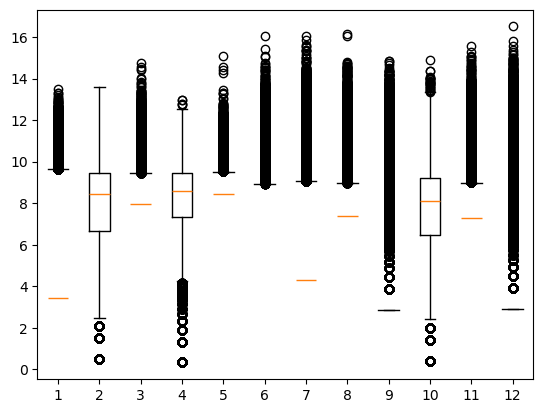

In [186]:
# after remove 0 or using a threshold 100 (specified in the original paper)
plt.boxplot(np.log2(df_thres[count_cols])+1)

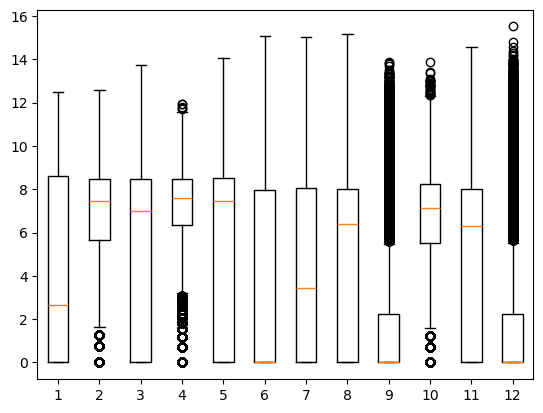

In [188]:
df_norm = pd.read_table('report/all_sample/all_sample.normalized.txt', sep='\t')
plt.boxplot(np.log2(df_norm[count_cols]+1));

# check sgRNA mean-variance relationship

Text(0.5, 0, 'log2(Mean)')

Text(0, 0.5, 'log2(Variance)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


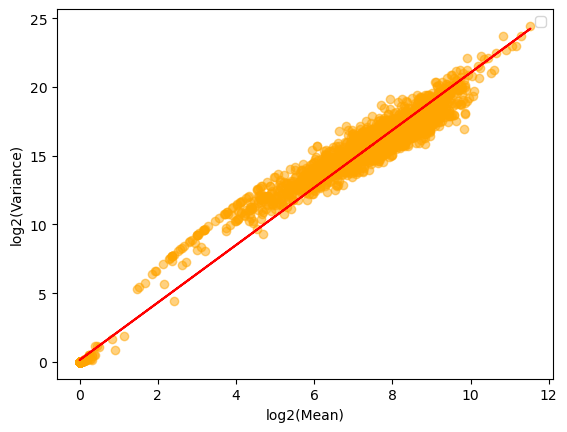

In [173]:
from scipy.stats import linregress
means_log2 = np.log2(df_ntc_thres[count_cols].T.mean() + 1)
variances_log2 = np.log2(df_ntc_thres[count_cols].T.var() + 1)
# means_minus_variances_log2 = np.log2(df_ntc_thres[count_cols].T.mean() - df_ntc_thres[count_cols].T.var() + 1)
plt.scatter(means_log2, variances_log2, color='orange', alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress( means_log2, variances_log2)
plt.plot(means_log2, slope * means_log2 + intercept, color='red')
# Labeling the axes
plt.xlabel('log2(Mean)')
plt.ylabel('log2(Variance)')
# Show legend
plt.legend()
# Show plot
plt.show()

Text(0.5, 0, 'log2(Mean + 1)')

Text(0, 0.5, 'log2(Variance + 1)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


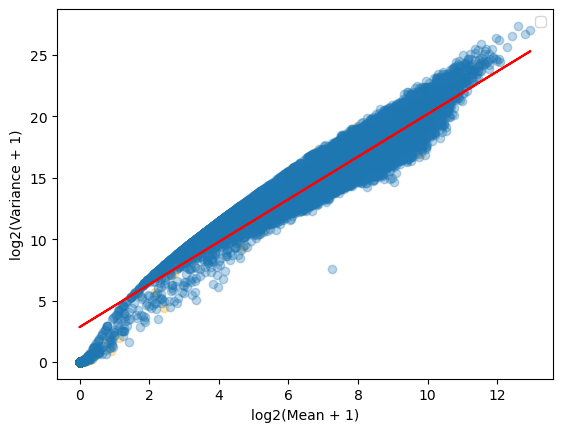

In [174]:
# check the mean-variance relationship for the target sgRNA
ntc_means_log2 = np.log2(df_ntc_thres[count_cols].T.mean() + 1)
ntc_variances_log2 = np.log2(df_ntc_thres[count_cols].T.var() + 1)
plt.scatter(ntc_means_log2, ntc_variances_log2, color='orange', alpha=0.3)
slope, intercept, r_value, p_value, std_err = linregress(means_log2, variances_log2)

means_log2 = np.log2(df_target_thresh[count_cols].T.mean()  + 1)
variances_log2 = np.log2(df_target_thresh[count_cols].T.var()  +1)
plt.scatter(means_log2, variances_log2, alpha=0.3)
slope, intercept, r_value, p_value, std_err = linregress(means_log2, variances_log2)
plt.plot(means_log2, slope * means_log2 + intercept, color='red')
# Labeling the axes
plt.xlabel('log2(Mean + 1)')
plt.ylabel('log2(Variance + 1)')
plt.legend() 
plt.show()

In [165]:
def plot_hist(df, sample1, sample2,bins=50):
    plt.figure()
    np.log(df[sample1] + 1).hist(alpha=0.8, label=sample1, bins=bins)  # Set alpha for transparency to distinguish overlapping areas
    np.log(df[sample2] + 1).hist(alpha=0.8, label=sample2, bins=bins)
    plt.title('Histogram Comparison between' + sample1 + 'and' + sample2)
    plt.xlabel('log (count + 1)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

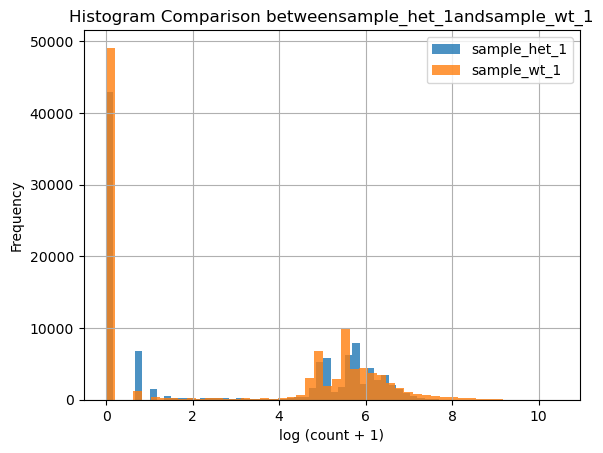

In [120]:
plot_hist(df, 'sample_het_1', 'sample_wt_1')

# Create negative control list for normalization purpose

In [ ]:
negative_controls = df[df['sgRNA'].str.contains('negative_control')]['sgRNA']

# Writing these values to a text file
with open('data/negative_controls.txt', 'w') as file:
    for value in negative_controls:
        file.write(value + '\n')

In [ ]:
# check negative controls variance
plot_hist(df[df['sgRNA'].str.contains('negative_control')], 'sample_het_1', 'sample_wt_1')

In [ ]:
# check regular sgRNA variance
plot_hist(df[~df['sgRNA'].str.contains('negative_control')], 'sample_het_1', 'sample_wt_1')

In [ ]:
# Run test

In [ ]:
# simply run this command to get normalized counts
!mageck test -k data/mageck_input_merged_counts.txt -t sample_het_1 -c sample_wt_1 --control-sgrna data/negative_controls.txt -n report/sample_1/sample_1 --pdf-report --normcounts-to-file

In [ ]:
!mageck pathway --gene-ranking report/sample_1/sample_1.gene_summary.txt --gmt-file library/m2.cp.reactome.v2023.2.Mm.symbols.gmt  --output-prefix report/sample_1/sample_1

In [ ]:
%run src/python/MAGeCK-iNC.py --fdr 0.05 --counts_file data/mageck_input_merged_counts.txt --control_group sample_wt_1 --counts_thres_control 100 --treatment_group sample_het_1 --counts_thres_treatment 100 --negative_control_keyword negative_control --control_sgrna data/negative_controls.txt --output_folder report/sample_1 --output_name MAGECK_INC_sample_1 --make_plot 1

# Compare sample 6

In [ ]:
# todo: using large bins to see the distribution
plot_hist(df, 'sample_het_6', 'sample_wt_6')
plot_hist(df[df['sgRNA'].str.contains('negative_control')], 'sample_het_6', 'sample_wt_6')
plot_hist(df[~df['sgRNA'].str.contains('negative_control')], 'sample_het_6', 'sample_wt_6')

In [193]:
from src.python.MAGeCK_iNC import execute
execute('mageck test -k report/all_sample/all_sample.normalized.txt -t sample_het_6 -c sample_wt_6 --variance-estimation-samples ' +  ','.join([f"sample_het_{i}" for i in range(1, 7)]) + ',' + ','.join([f'sample_wt_{i}' for i in range(1, 7)]) +  ' -n report/sample_6/sample_6 --pdf-report --norm-method none')

usage: mageck test [-h] -k COUNT_TABLE
                   (-t TREATMENT_ID | --day0-label DAY0_LABEL) [-c CONTROL_ID]
                   [--paired] [--norm-method {none,median,total,control}]
                   [--gene-test-fdr-threshold GENE_TEST_FDR_THRESHOLD]
                   [--adjust-method {fdr,holm,pounds}]
                   [--variance-estimation-samples VARIANCE_ESTIMATION_SAMPLES]
                   [--sort-criteria {neg,pos}]
                   [--remove-zero {none,control,treatment,both,any}]
                   [--remove-zero-threshold REMOVE_ZERO_THRESHOLD]
                   [--pdf-report]
                   [--gene-lfc-method {median,alphamedian,mean,alphamean,secondbest}]
                   [-n OUTPUT_PREFIX]
                   [--control-sgrna CONTROL_SGRNA | --control-gene CONTROL_GENE]
                   [--normcounts-to-file] [--skip-gene SKIP_GENE] [--keep-tmp]
                   [--additional-rra-parameters ADDITIONAL_RRA_PARAMETERS]
                   [--cnv-n

INFO  @ Mon, 26 Feb 2024 21:55:05: Parameters: /Users/cgu3/anaconda3/envs/mageckenv/bin/mageck test -k report/all_sample/all_sample.normalized.txt -t sample_het_6 -c sample_wt_6 --variance-estimation-samples sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6 -n report/sample_6/sample_6 --pdf-report --norm-method none 
INFO  @ Mon, 26 Feb 2024 21:55:05: Welcome to MAGeCK v0.5.9.5. Command: test 
INFO  @ Mon, 26 Feb 2024 21:55:05: Loading count table from report/all_sample/all_sample.normalized.txt  
INFO  @ Mon, 26 Feb 2024 21:55:05: Processing 1 lines.. 
INFO  @ Mon, 26 Feb 2024 21:55:06: Processing 100001 lines.. 
INFO  @ Mon, 26 Feb 2024 21:55:06: Loaded 103650 records. 
INFO  @ Mon, 26 Feb 2024 21:55:06: Loading Rnw template file: /Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/mageck/test_report.Rmd. 
INFO  @ Mon, 26 Feb 2024 21:55:06: Loading R template file: /Users

In [196]:
from src.python.MAGeCK_iNC import execute
execute('mageck test -k report/all_sample/all_sample.normalized.txt -t sample_het_6 -c sample_wt_6 --variance-estimation-samples ' +  ','.join([f"sample_het_{i}" for i in range(1, 7)]) + ',' + ','.join([f'sample_wt_{i}' for i in range(1, 7)]) +  ' -n report/sample_6/sample_6_FDR_1 --pdf-report --norm-method none --gene-test-fdr-threshold 1')

mageck test -k report/all_sample/all_sample.normalized.txt -t sample_het_6 -c sample_wt_6 --variance-estimation-samples sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6 -n report/sample_6/sample_6_FDR_1 --pdf-report --norm-method none --gene-test-fdr-threshold 1


INFO  @ Mon, 26 Feb 2024 22:00:03: Parameters: /Users/cgu3/anaconda3/envs/mageckenv/bin/mageck test -k report/all_sample/all_sample.normalized.txt -t sample_het_6 -c sample_wt_6 --variance-estimation-samples sample_het_1,sample_het_2,sample_het_3,sample_het_4,sample_het_5,sample_het_6,sample_wt_1,sample_wt_2,sample_wt_3,sample_wt_4,sample_wt_5,sample_wt_6 -n report/sample_6/sample_6_FDR_1 --pdf-report --norm-method none --gene-test-fdr-threshold 1 
INFO  @ Mon, 26 Feb 2024 22:00:03: Welcome to MAGeCK v0.5.9.5. Command: test 
INFO  @ Mon, 26 Feb 2024 22:00:03: Loading count table from report/all_sample/all_sample.normalized.txt  
INFO  @ Mon, 26 Feb 2024 22:00:03: Processing 1 lines.. 
INFO  @ Mon, 26 Feb 2024 22:00:03: Processing 100001 lines.. 
INFO  @ Mon, 26 Feb 2024 22:00:03: Loaded 103650 records. 
INFO  @ Mon, 26 Feb 2024 22:00:03: Loading Rnw template file: /Users/cgu3/anaconda3/envs/mageckenv/lib/python3.10/site-packages/mageck/test_report.Rmd. 
INFO  @ Mon, 26 Feb 2024 22:00:0

In [ ]:
!mageck pathway --gene-ranking report/sample_6/sample_6.gene_summary.txt --gmt-file library/m2.cp.reactome.v2023.2.Mm.symbols.gmt  --output-prefix report/sample_6/sample_6

# Simply determine DEG by abs(lfc) > 1 and use those for pathway analysis

In [202]:
naive_degs = pd.read_table('report/sample_6/sample_6_FDR_1.gene_summary.txt', sep='\t')
naive_degs = naive_degs[(naive_degs['neg|lfc'] < -1) | (naive_degs['pos|lfc'] > 1)]
naive_degs.to_csv('report/sample_6/sample_6_naive_degs.txt', sep='\t', index=False)

In [203]:
!mageck pathway --gene-ranking report/sample_6/sample_6_naive_degs.txt --gmt-file library/m2.cp.reactome.v2023.2.Mm.symbols.gmt  --output-prefix report/sample_6/sample_6_FDR_1

INFO  @ Mon, 26 Feb 2024 22:05:44: Parameters: /Users/cgu3/anaconda3/envs/mageckenv/bin/mageck pathway --gene-ranking report/sample_6/sample_6_naive_degs.txt --gmt-file library/m2.cp.reactome.v2023.2.Mm.symbols.gmt --output-prefix report/sample_6/sample_6_FDR_1 
INFO  @ Mon, 26 Feb 2024 22:05:44: Welcome to MAGeCK v0.5.9.5. Command: pathway 
INFO  @ Mon, 26 Feb 2024 22:05:44: GSEA command for negative selection: mageckGSEA  -s  -c 2  -p 1000 -g "library/m2.cp.reactome.v2023.2.Mm.symbols.gmt"  -r "report/sample_6/sample_6_naive_degs.txt"  -o report/sample_6/sample_6_FDR_1.pathway.low.txt  
INFO  @ Mon, 26 Feb 2024 22:05:44: Running command: mageckGSEA  -s  -c 2  -p 1000 -g "library/m2.cp.reactome.v2023.2.Mm.symbols.gmt"  -r "report/sample_6/sample_6_naive_degs.txt"  -o report/sample_6/sample_6_FDR_1.pathway.low.txt  
INFO  @ Mon, 26 Feb 2024 22:05:50: Command message: 
INFO  @ Mon, 26 Feb 2024 22:05:50:   GMT file: library/m2.cp.reactome.v2023.2.Mm.symbols.gmt 
INFO  @ Mon, 26 Feb 2024 

In [ ]:
%run src/python/MAGeCK-iNC.py --fdr 0.05 --counts_file data/mageck_input_merged_counts.txt --control_group sample_wt_6 --counts_thres_control 100 --treatment_group sample_het_6 --counts_thres_treatment 100 --negative_control_keyword negative_control --control_sgrna data/negative_controls.txt --output_folder report/sample_6 --output_name MAGECK_INC_sample_6 --make_plot 1